## Find the Flag

Can you guess which continent this flag comes from?

<img src='flag.png' width='300px;'>  
  
What are some of the features that would clue you in? Maybe some of the colors are good indicators. The presence or absence of certain shapes could give you a hint. In this project, we’ll use decision trees to try to predict the continent of flags based on several of these features.

We’ll explore which features are the best to use and the best way to create your decision tree.

[Flags Dataset from UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Flags)

In [1]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [19]:
# data import
flags = pd.read_csv('flags.csv')
flags.drop(['ind', 'Unnamed: 31',], axis=1, inplace=True) # remove columna dded while generating csv

In [20]:
# check import
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [21]:
# look at available features
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

In [23]:
# check dimensions
flags.shape

(194, 30)

In [35]:
# check for null
flags.isna().sum()

Name          0
Landmass      0
Zone          0
Area          0
Population    0
Language      0
Religion      0
Bars          0
Stripes       0
Colors        0
Red           0
Green         0
Blue          0
Gold          0
White         0
Black         0
Orange        0
Mainhue       0
Circles       0
Crosses       0
Saltires      0
Quarters      0
Sunstars      0
Crescent      0
Triangle      0
Icon          0
Animate       0
Text          0
Topleft       0
Botright      0
dtype: int64

## Creating data and labels

Project outline:
1. Going to create decision tree to classify the Landmass a country is on
2. Use colours as training data

In [24]:
# create var named labels equal to 'Landmass' column from flags
labels = flags.Landmass

In [27]:
# use colours as training data
data = flags[['Red', 'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange']]

In [29]:
# check
print(labels.head(5))
print(data.head(5))

0    5
1    3
2    4
3    6
4    3
Name: Landmass, dtype: int64
   Red  Green  Blue  Gold  White  Black  Orange
0    1      1     0     1      1      1       0
1    1      0     0     1      0      1       0
2    1      1     0     0      1      0       0
3    1      0     1     1      1      0       1
4    1      0     1     1      0      0       0


In [31]:
# split into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 1)

### Make and test the model

In [34]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(train_data, train_labels)
print("Accuracy on test data: {:.3f}".format(tree.score(test_data, test_labels)))

Accuracy on test data: 0.347


### Tuning the Model

In [68]:
scores = []

for i in range(1,21):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(train_data, train_labels)
    accuracy = clf.score(test_data, test_labels)
    scores.append([i, accuracy])

In [69]:
max(sorted(scores, key= lambda x: x[1], reverse=True))

[20, 0.3469387755102041]

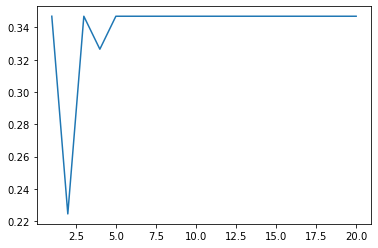

In [71]:
# graph scores

# extract depths
depths = [x[0] for x in scores]

# extract scores
scores_only = [x[1] for x in scores]

plt.plot(depths, scores_only)
plt.show()

### NEWSFLASH
Terrible score and lack of impact from changing depth shows features predictive. Try using all features.

In [72]:
data = flags[["Red", "Green", "Blue", "Gold",
 "White", "Black", "Orange",
 "Circles",
"Crosses","Saltires","Quarters","Sunstars",
"Crescent","Triangle"]]

In [73]:
# split into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 1)

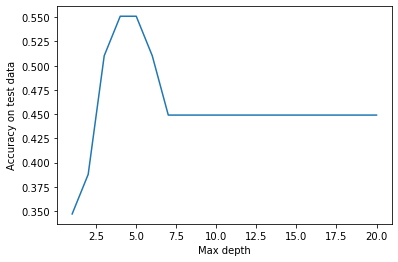

In [75]:
# train model with i = 1-20

scores = []

for i in range(1,21):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(train_data, train_labels)
    accuracy = clf.score(test_data, test_labels)
    scores.append([i, accuracy])

# plot
# graph scores

# extract depths
depths = [x[0] for x in scores]

# extract scores
scores_only = [x[1] for x in scores]

plt.plot(depths, scores_only)
plt.xlabel('Max depth')
plt.ylabel('Accuracy on test data')
plt.show()

## Summary

Nice work! That graph looks more like what we’d expect. If the tree is too short, we’re underfitting and not accurately representing the training data. If the tree is too big, we’re getting too specific and relying too heavily on the training data.

There are a few different ways to extend this project:

1. Try to classify something else! Rather than predicting the "Landmass" feature, could predict something like the "Language"?
2. Find a subset of features that work better than what we’re currently using. An important note is that a feature that has categorical data won’t work very well as a feature. For example, we don’t want a decision node to split nodes based on whether the value for "Language" is above or below 5.
3. Tune more parameters of the model. You can find a description of all the parameters you can tune in the [Decision Tree Classifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). For example, see what happens if you tune max_leaf_nodes. Think about whether you would be overfitting or underfitting the data based on how many leaf nodes you allow.

In [156]:
# prep for more work:

def train_trees(train_data, train_labels, depth):
    # split into train and test sets, random state for reproducibility
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 1)
    
    # train model with i = 1-20

    scores = []

    for i in range(1,depth+1):
        clf = DecisionTreeClassifier(max_depth=i)
        clf.fit(train_data, train_labels)
        accuracy = clf.score(test_data, test_labels)
        scores.append([i, accuracy])

        
    # graph scores

    # extract depths
    depths = [x[0] for x in scores]

    # extract scores
    scores_only = [x[1] for x in scores]
        
    plt.plot(depths, scores_only)
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy on test data')
    plt.show()

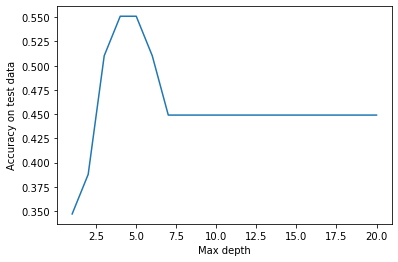

In [157]:
train_trees(train_data, train_labels, 20)

In [212]:
# prep for more work:

def train_trees(train_data, train_labels, depth):
    # split into train and test sets, random state for reproducibility
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 1)
    
    # train model with i = 1-20

    scores = []

    for i in range(1,depth+1):
        clf = DecisionTreeClassifier(max_depth=i)
        clf.fit(train_data, train_labels)
        accuracy = clf.score(test_data, test_labels)
        scores.append([i, accuracy])

        
    # graph scores

    # extract depths
    depths = [x[0] for x in scores]

    # extract scores
    scores_only = [x[1] for x in scores]
        
    plt.plot(depths, scores_only)
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy on test data')
    
    ymax = max(scores_only)
    xmax = depths[scores_only.index(ymax)]
    text= "Best accuracy={:.3f} at depth={:.0f}, ".format(ymax, xmax)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    plt.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)


plt.show()

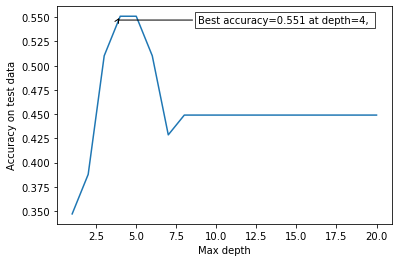

In [213]:
train_trees(train_data, train_labels, 20)